<a href="https://www.kaggle.com/code/mastersniffer/pandas-seaborn-and-matplotlib-for-graphics?scriptVersionId=116812569" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from time import perf_counter, sleep
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()

pd.set_option('display.max_rows', 90)

# Первичный анализ датасета

Датасет состоит из бинарных и простых категориальных значений. К тому же он имеет числовые значения, которые представлены в последних 3 колонках

In [2]:
df = pd.read_csv("/kaggle/input/studentsdataset/exams (1).csv")
print(df.shape)
df.head(5)

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [3]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [4]:
# Как мы видим, пустых значений нет
df.isnull().sum() 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
# Значений в стиле NaN тут тоже не наблюдается
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 342.5 KB


# Первые и последние столбцы

In [6]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [7]:
df.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82
999,male,group A,some college,standard,completed,65,60,62


In [8]:
pd.concat([df.head(10), df.tail(5)])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


# Нахождение средних значений

In [9]:
#Среднее каждой колонки, где есть числа
df.mean(axis=0)

math score       66.396
reading score    69.002
writing score    67.738
dtype: float64

# Графики (задание 5)

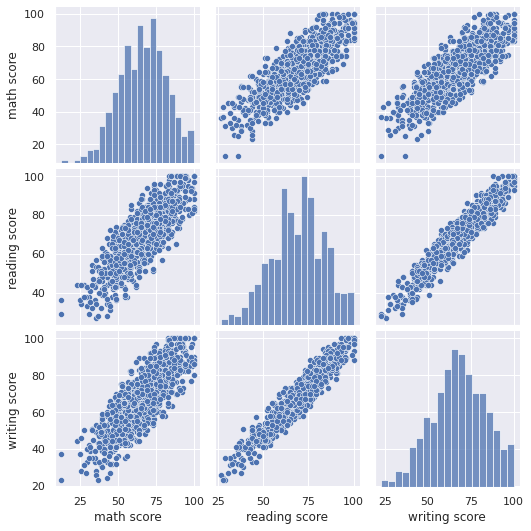

In [10]:
sns.pairplot(df)

<AxesSubplot:xlabel='gender,test preparation course'>

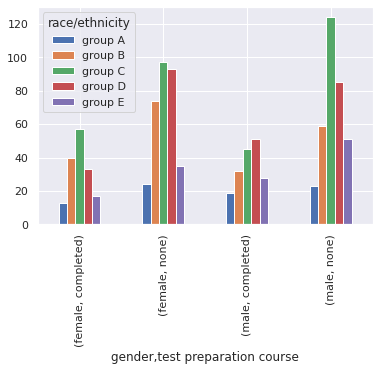

In [11]:
ct = pd.crosstab([df.gender, df['test preparation course']], df['race/ethnicity'])
ct.plot(kind="bar")

(array([[1000., 1000.],
        [   0., 1000.]]),
 array([0. , 1.5, 3. ]),
 <a list of 2 list[Polygon] objects>)

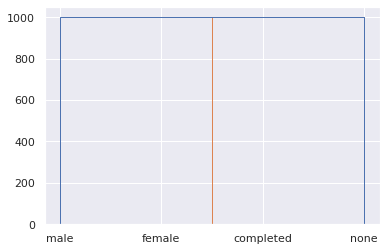

In [12]:
plt.hist([df.gender, df['test preparation course']], histtype='step', cumulative=True, bins=len([df.gender, df['test preparation course']]))

(array([[1000., 1000.],
        [  79., 1000.]]),
 array([0., 3., 6.]),
 <a list of 2 list[Polygon] objects>)

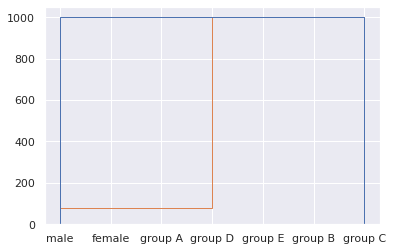

In [13]:
plt.hist([df.gender, df['race/ethnicity']], histtype='step', cumulative=True, bins=len([df.gender, df['race/ethnicity']]))

(array([[1000., 1000., 1000.],
        [  79.,  677., 1000.],
        [   0.,    0., 1000.]]),
 array([0.        , 2.66666667, 5.33333333, 8.        ]),
 <a list of 3 list[Polygon] objects>)

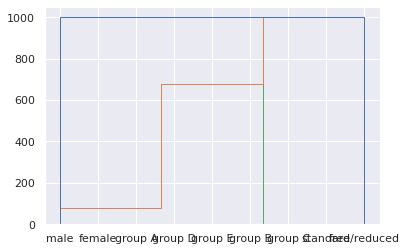

In [14]:
plt.hist([df.gender, df['race/ethnicity'], df['lunch']], histtype='step', cumulative=True, bins=len([df.gender, df['race/ethnicity'], df['lunch']]))

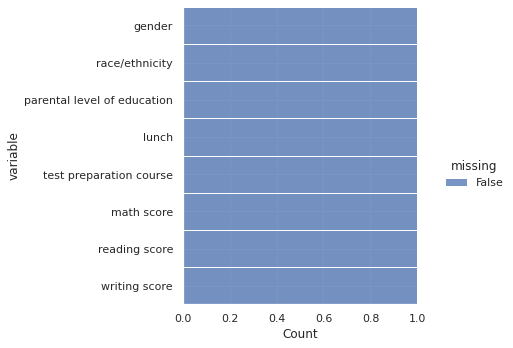

In [15]:
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

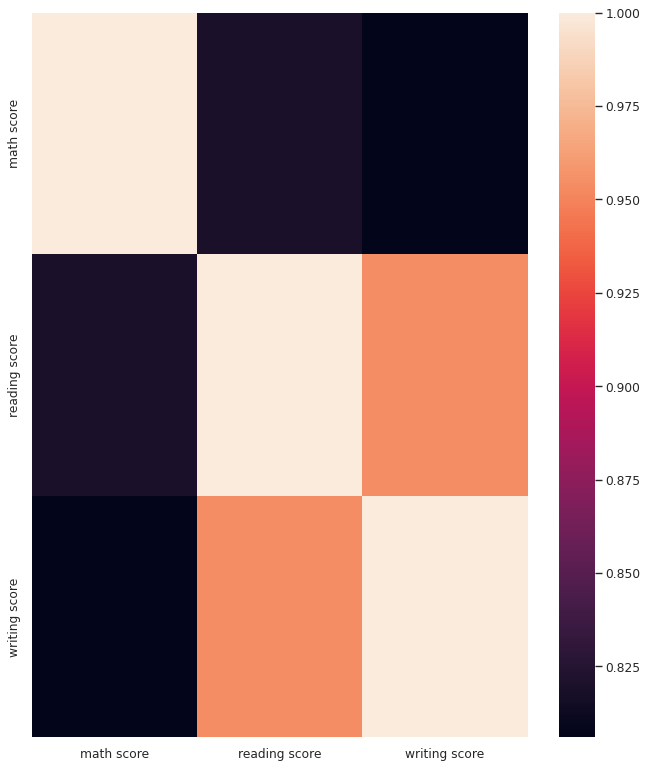

In [16]:
figure(figsize=(10, 12), dpi=80)
sns.heatmap(df.corr());

In [17]:
def male_plots(feat):
    
    figure(figsize=(10, 12), dpi=80)
    
    x = df[feat]
    y = df['math score']
    
    plt.subplot(2, 2, 1)
    plt.scatter(x, y)
    plt.xlabel(feat, size = 12 )
    plt.ylabel('math score', size = 12 )
    plt.title('Scatterplot')
    
    plt.subplot(2, 2, 3)
    x.hist()
    plt.xlabel(feat, size = 12 )
    plt.title('Histogram')
    
    plt.subplot(2, 2, 4)
    plt.plot(np.sort(x), np.linspace(0, 1, len(x), endpoint=False))
    plt.xlabel(feat, size = 12 )
    plt.title('ECDF')
    plt.show()

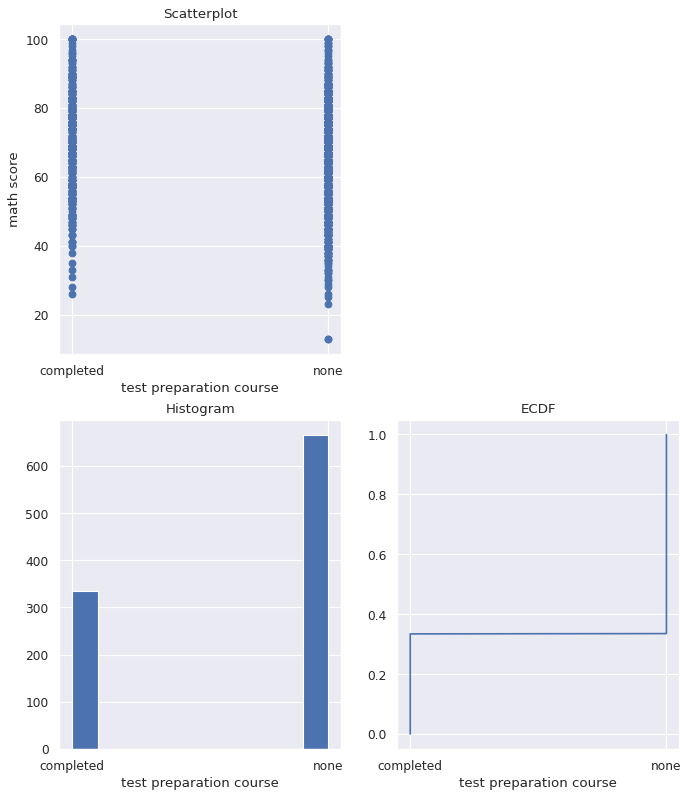

In [18]:
# функцич для детального анализа признака
male_plots("test preparation course")

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.396,15.402871,13.0,56.0,66.5,77.0,100.0
reading score,1000.0,69.002,14.737272,27.0,60.0,70.0,79.0,100.0
writing score,1000.0,67.738,15.600985,23.0,58.0,68.0,79.0,100.0


In [20]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     77
reading score                  73
writing score                  76
dtype: int64

# Исправление данных

Количество идеально написанных тестов велико, что заставляет задуматься, что у нас есть аномальные значения. Чтобы дальше продолжать анализ - мы удалим эти значения, но оставим, к примеру, самые низкие

Посмотрим, что из этого получится

In [21]:
# удалим максимальное значение как аномальное
df = df[df['math score'] < df['math score'].max()]
df = df[df['reading score'] < df['reading score'].max()]
df = df[df['writing score'] < df['writing score'].max()]

In [22]:
df.describe()

,math score,reading score,writing score
count,966.000000,966.000000,966.000000
mean,65.431677,68.054865,66.747412
std,14.729935,14.040729,14.895156
min,13.000000,27.000000,23.000000
25%,55.000000,59.000000,57.000000
50%,66.000000,69.000000,67.000000
75%,76.000000,78.000000,78.000000
max,99.000000,99.000000,99.000000


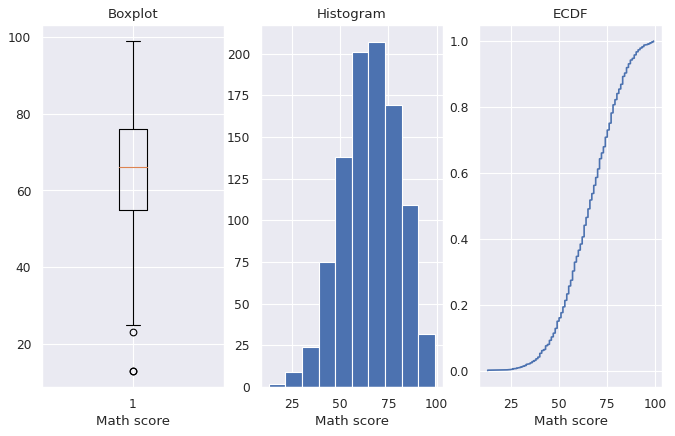

In [23]:
figure(figsize=(10, 6), dpi=80)
y = df['math score']

plt.subplot(1, 3, 1)
plt.boxplot(y) 
plt.xlabel('Math score', size = 12 )
plt.title('Boxplot')

plt.subplot(1, 3, 2)
y.hist()
plt.xlabel('Math score', size = 12 )
plt.title('Histogram')

plt.subplot(1, 3, 3)
plt.plot(np.sort(y), np.linspace(0, 1, len(y), endpoint=False))
plt.xlabel('Math score', size = 12 )
plt.title('ECDF')
plt.show()

как мы видим, кол-во выбросов у нас снизилось

## Визуализация - секторные диаграммы

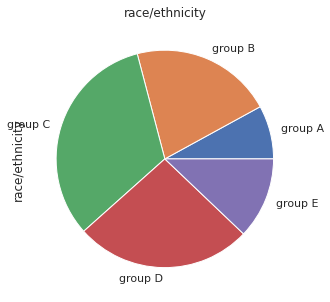

In [24]:
df_pie = df.groupby('race/ethnicity').size()
df_pie.plot.pie(figsize=(5, 5), title = 'race/ethnicity', ylabel = 'race/ethnicity');

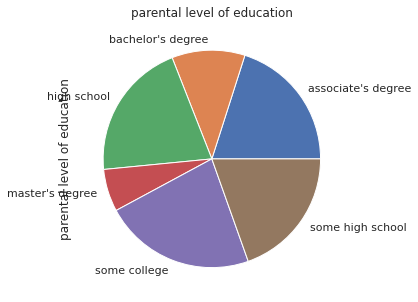

In [25]:
df_pie = df.groupby('parental level of education').size()
df_pie.plot.pie(figsize=(5, 5), title = 'parental level of education', ylabel = 'parental level of education');

## Столбчатые диаграммы

Тут мы наблюдаем столбчатые диаграммы, которые в своей основе принимают вид нормального распределения и не имеют экспоненциального 

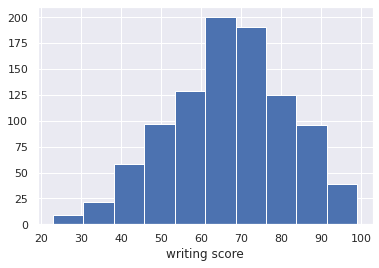

In [26]:
# Тут мы видим пример нормального распределения
x = 'writing score'
df[x].hist()
plt.xlabel(x, size = 12 )
plt.show()

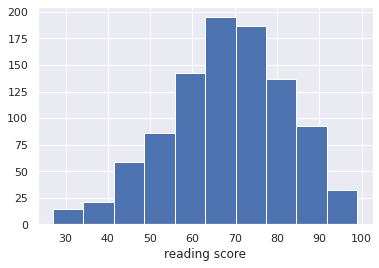

In [27]:
x = 'reading score'
df[x].hist()
plt.xlabel(x, size = 12 )
plt.show()

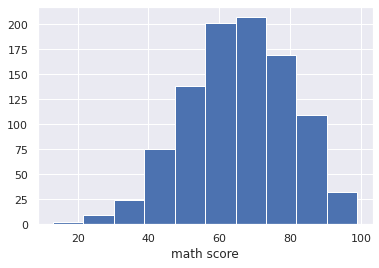

In [28]:
x = 'math score'
df[x].hist()
plt.xlabel(x, size = 12 )
plt.show()

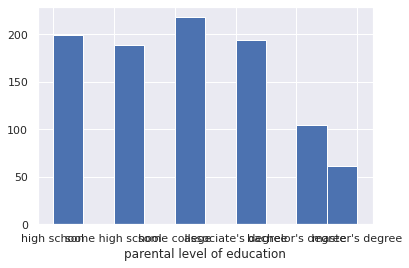

In [29]:
x = 'parental level of education'
df[x].hist()
plt.xlabel(x, size = 12 )
plt.show()

## Ящики с усами для числовых колонок


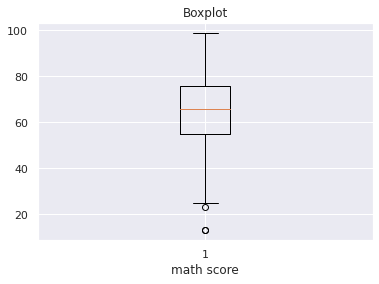

In [30]:
feat = 'math score'
plt.boxplot(df[feat]) 
plt.xlabel(feat, size = 12 )
plt.title('Boxplot')
plt.show()

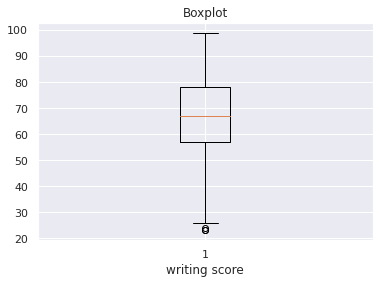

In [31]:
feat = 'writing score'
plt.boxplot(df[feat]) 
plt.xlabel(feat, size = 12 )
plt.title('Boxplot')
plt.show()

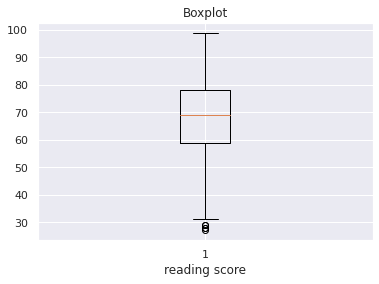

In [32]:
feat = 'reading score'
plt.boxplot(df[feat]) 
plt.xlabel(feat, size = 12 )
plt.title('Boxplot')
plt.show()

# Попарные зависимости

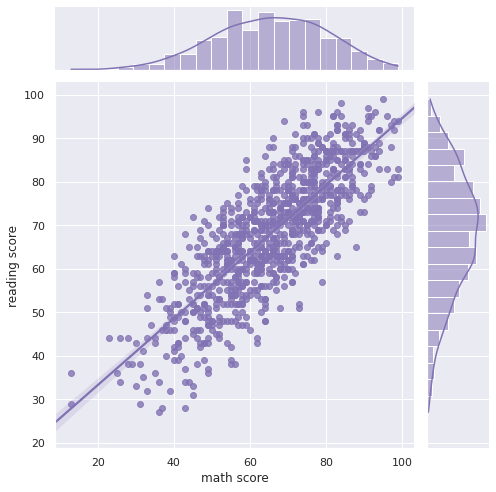

In [33]:
x1 = 'math score'
x2 = 'reading score'

sns.jointplot(x=x1, y=x2, data=df,
                  kind="reg", truncate=False,
                  color="m", height=7)

plt.xlabel(x1)
plt.xlabel(x2)
plt.show()